<a href="https://colab.research.google.com/github/NayeGarciaP/Mi-primer-repositorio-/blob/main/Redes_de_multicapa/RED_NEURONAL_(Clasificaci%C3%B3n_de_candidatos).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerias
import numpy as np
import pandas as pd

# Generar dataset sintético con diferentes rangos por habilidad
n_muestras = 5000
# Habilidades técnicas: 70-100 #Segmentar por habilidades matematicas tecnológicas
tec = np.random.randint(70, 101, (n_muestras, 6)) # Toma del numpy numero aleatorio entero entre 70 y 100, filas y columnas
# Habilidades matemáticas: 60-90
mat = np.random.randint(60, 91, (n_muestras, 6)) #Mide la cantidad de muestras  6
# Habilidades psicológicas: 50-85
psi = np.random.randint(50, 86, (n_muestras, 6)) # 6 habilidades tecnicas, matematicas y psicologicas
# Nombres de columnas
columnas = [ #Queremos clasificar las columanas por nombre para ver cual de ellas sabe
    'python', 'sql', 'visualizacion_datos', 'excel', 'manejo_apis', 'nube',
    'estadistica', 'probabilidad', 'algebra_lineal', 'calculo', 'optimizacion', 'modelado',
    'trabajo_equipo', 'comunicacion', 'creatividad', 'adaptabilidad', 'liderazgo', 'resolucion_problemas'
]
# Crear DataFrame #Generar un dataframe
#Define los nombres de las 18 columnas
#Unira las tres matrices en una sola tabla
df = pd.DataFrame(np.concatenate([tec, mat, psi], axis=1), columns=columnas)



In [2]:

df

,python,sql,visualizacion_datos,excel,manejo_apis,nube,estadistica,probabilidad,algebra_lineal,calculo,optimizacion,modelado,trabajo_equipo,comunicacion,creatividad,adaptabilidad,liderazgo,resolucion_problemas
0,97,88,70,83,88,70,89,74,76,72,63,79,51,65,82,80,76,71
1,94,74,80,70,98,88,76,85,90,63,76,61,79,68,70,78,51,77
2,90,86,75,87,83,97,80,66,83,67,63,79,68,57,80,52,59,77
3,83,95,70,84,74,76,66,75,64,70,76,66,56,76,60,51,57,79
4,75,97,83,70,79,82,77,64,80,78,61,72,65,80,58,76,54,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,84,75,86,100,93,78,77,75,80,77,71,87,59,66,79,60,59,84
4996,78,95,96,78,78,82,62,79,72,81,74,79,76,54,65,55,65,85
4997,90,95,89,79,77,72,69,63,68,66,71,68,73,56,60,72,56,84
4998,97,87,86,98,97,89,90,62,76,63,66,88,66,62,62,56,54,63


Obtenemos la etiqueta y

In [3]:
# Calcular promedio por grupo y promedio total
#Crea las etiquetas, calcula el promedio
prom_tecnologicas = df[['python', 'sql', 'visualizacion_datos', 'excel', 'manejo_apis', 'nube']].mean(axis=1)
prom_matematicas  = df[['estadistica', 'probabilidad', 'algebra_lineal', 'calculo', 'optimizacion', 'modelado']].mean(axis=1)
prom_psicologicas = df[['trabajo_equipo', 'comunicacion', 'creatividad', 'adaptabilidad', 'liderazgo', 'resolucion_problemas']].mean(axis=1)
# Promedio total = promedio de los 3 promedios
prom_total = (prom_tecnologicas + prom_matematicas + prom_psicologicas) / 3 #se obtiene el total
# Etiqueta: 1 = apto si promedio total > 80
y = (prom_total > 75).astype(int) #Asigna valores
# one-hot encoding
y = pd.get_dummies(y).values

In [4]:
y

array([[False,  True],
       [False,  True],
       [ True, False],
       ...,
       [ True, False],
       [False,  True],
       [False,  True]])

Obtenemos los conjuntos de entrenamiento y de test




In [5]:
from sklearn.model_selection import train_test_split #Separa por bloque
X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.2, random_state=42 #20% de porcentaje
)

# Escalamiento
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Red **neuronal**

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
modelo = Sequential([ #18
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'), #64
    Dense(32, activation='relu'), # 32 capas ocultas, el relu se puede cambiar por el sigmoid
    Dense(16, activation='relu'), #capas oculta con 16 neuronas
    Dense(2, activation='softmax') # Coincide con la cantidad de clases que voy a tener #capa de salida 2 neuronas
])
#18 columnas del dataframe (6*3) 18 parametros
adam = Adam(learning_rate=0.001)
modelo.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entrenamiento

In [7]:
#optimizador come el aprendizaje
#para la metrica se usa la presicion para evaluar la métrica
history = modelo.fit(  #Entrena 50 épocas
    X_train, y_train,
    epochs=50,
    batch_size=1, # se puede cambiar por 8 y si colocas cero no da nada
    validation_data=(X_test, y_test),
    verbose=1
) #el accuracy y loss son parte del entrenamiento

Epoch 1/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8884 - loss: 0.2585 - val_accuracy: 0.9630 - val_loss: 0.0759
Epoch 2/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9740 - loss: 0.0624 - val_accuracy: 0.9680 - val_loss: 0.0665
Epoch 3/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9848 - loss: 0.0489 - val_accuracy: 0.9650 - val_loss: 0.0650
Epoch 4/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9853 - loss: 0.0380 - val_accuracy: 0.9700 - val_loss: 0.0756
Epoch 5/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9853 - loss: 0.0361 - val_accuracy: 0.9740 - val_loss: 0.0758
Epoch 6/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9897 - loss: 0.0312 - val_accuracy: 0.9660 - val_loss: 0.0752
Epoch 7/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9857 - loss: 0.0301 - val_accuracy: 0.9680 - val_loss: 0.0987
Epoch 8/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9876 - loss: 0

Evaluación

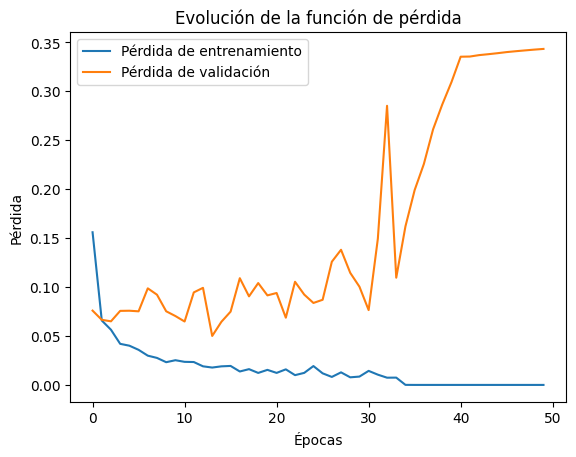

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9791 - loss: 0.2782

🔹 Loss: 0.3432  |  Accuracy: 0.9760


In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Evolución de la función de pérdida')
plt.show()

loss, acc = modelo.evaluate(X_test, y_test)
print(f"\n🔹 Loss: {loss:.4f}  |  Accuracy: {acc:.4f}")

Matriz de confusión

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


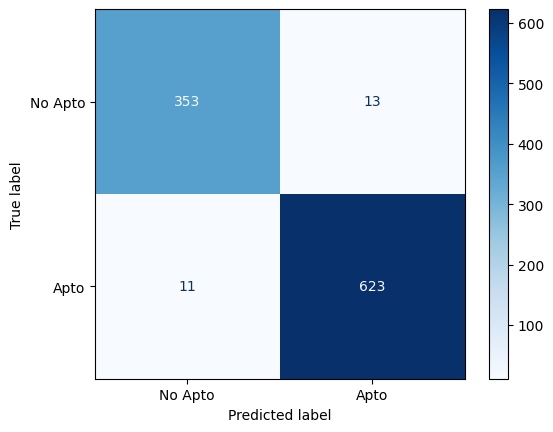


Sensitivity (Recall) por clase:
No Apto: 0.96
Apto: 0.98


In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

pred = modelo.predict(X_test)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Apto', 'Apto'])
disp.plot(cmap='Blues')
plt.show()

sensitivity = recall_score(y_true, y_pred, average=None)
print("\nSensitivity (Recall) por clase:")
print(f"No Apto: {sensitivity[0]:.2f}")
print(f"Apto: {sensitivity[1]:.2f}")

Evaluar un nuevo candidato

In [10]:
nuevo_candidato = np.array([[90, 88, 85, 87, 84, 89,   # técnicas
                             82, 86, 85, 83, 87, 80,   # matemáticas
                             70, 75, 80, 72, 78, 74]]) # psicológicas

nuevo_candidato_scaled = scaler.transform(nuevo_candidato)
pred_nuevo = modelo.predict(nuevo_candidato_scaled)
clase_predicha = np.argmax(pred_nuevo)

print("Evaluación de nuevo candidato:")
print(f"Resultado: {'Apto' if clase_predicha == 1 else 'No Apto'}")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
Evaluación de nuevo candidato:
Resultado: Apto


El codigo utiliza libreris para poder manejar los datos, escalar, construir y evaluar el modelo
Utiliza las etiquetas de "y" para saber si la persona es apta o no.
Separa los datos en entrenamiento y los prueba, normaliza los valores.
El modelo construye la red neuronal, el entrenamiento ajustara los pesos del modelo.
La evaluacion va a medir la precision y la perdida y la matriz de confusión muestra los aciertos y los errores.
La prediccion nueva va a evaluar a algun candidato nuevo